<a href="https://colab.research.google.com/github/Lorddickenstein/FSLRwithNLP/blob/main/Tutorials/Convolutional_Neural_Network_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [4]:
from tensorflow import keras
mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

Show data

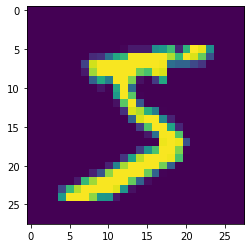

5


In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

print(y_train[0])

Breakdown Data so that the neural network can digest it.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# normalize data to range from 0.0-1.0
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

Convert the Y-values into 1s and 0s making them categorical variables. This is called **One-Hot Encoding**, without it the neural network will categorize numbers based on how they are related numerically and not how they look.

In [7]:
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Create model

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

# Training model

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, 
          epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 136s 289ms/step - loss: 2.2817 - accuracy: 0.1557 - val_loss: 2.2470 - val_accuracy: 0.3565
Epoch 2/20
469/469 [==============================] - 135s 288ms/step - loss: 2.2255 - accuracy: 0.2783 - val_loss: 2.1765 - val_accuracy: 0.5460
Epoch 3/20
469/469 [==============================] - 135s 288ms/step - loss: 2.1499 - accuracy: 0.3868 - val_loss: 2.0777 - val_accuracy: 0.6483
Epoch 4/20
469/469 [==============================] - 136s 289ms/step - loss: 2.0448 - accuracy: 0.4669 - val_loss: 1.9434 - val_accuracy: 0.7015
Epoch 5/20
469/469 [==============================] - 135s 288ms/step - loss: 1.9060 - accuracy: 0.5268 - val_loss: 1.7713 - val_accuracy: 0.7309
Epoch 6/20
469/469 [==============================] - 135s 289ms/step - loss: 1.7416 - accuracy: 0.5697 - val_loss: 1.5714 - val_accuracy: 0.7525
Epoch 7/20
469/469 [==============================] - 137s 291ms/step - loss: 1.5677 - accuracy: 0.5980 - val_loss: 1.3638 -

In [13]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 6s 21ms/step - loss: 0.4756 - accuracy: 0.8792
[0.4755679666996002, 0.8791999816894531]
